In [1]:
# velovi environment
# based on https://github.com/linnykos/veloUncertainty/blob/main/code/yuhong/pancreas/methods/velovi/v2_pan_velovi_3plots.py
# and https://github.com/linnykos/veloUncertainty/blob/main/veloUncertainty/v2_functions_velovi.py
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import anndata as ad
from velovi import preprocess_data, VELOVI

In [4]:
import sys
sys.path.append('/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/veloUncertainty')
from v2_functions import *
from v2_functions_velovi import *

In [3]:
method = 'velovi'
dataset_long = 'pancreas'
dataset_short = 'pan'

data_folder = "/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/yuhong/data/"
fig_folder = "/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/fig/yuhong/v2_"+dataset_long+"/"+method+"/"

total = sc.read_h5ad(data_folder+"v2_"+dataset_long+"/"+method+"/adata_"+dataset_short+"_"+method+"_total_v2.h5ad")
vae_total = VELOVI.load(data_folder+"v2_"+dataset_long+"/"+method+'/vae_pan_velovi_total_v2.pt', total)

INFO     File                                                                                                      
         /home/users/kzlin/kzlinlab/projects/veloUncertainty/out/yuhong/data/v2_pancreas/velovi/vae_pan_velovi_tota
         l_v2.pt/model.pt already downloaded                                                                       


In [5]:
add_velovi_outputs_to_adata(total, vae_total)

In [7]:
# run this to avoid the "ValueError: Your neighbor graph seems to be corrupted. Consider recomputing via pp.neighbors." error in the next block
scv.pp.neighbors(total, n_neighbors=30, n_pcs=30)

computing neighbors
    finished (0:00:16) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [8]:
# run this to avoid the "ValueError: You need to run `tl.velocity_graph` first to compute cosine correlations." error in the next block
scv.tl.velocity_graph(total)

computing velocity graph (using 1/20 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


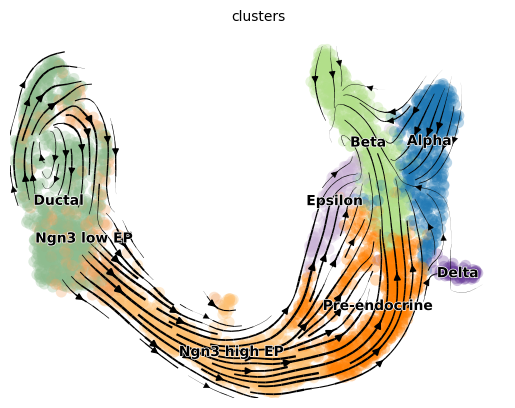

In [9]:
scv.pl.velocity_embedding_stream(total, 
                                 recompute=True,
                                 color="clusters", 
                                 dpi=100)